# 00. Contents

### 01. Importing libraries

### 02. Importing data

### 03. Plotting

### 04. Decomposition

### 05. Stationarity

# 01. Importing libraries

In [269]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# 02. Importing data

In [320]:
# Creating a path

path = r'/Users/agne/Documents/Studies/Data Analysis/Study Materials/Advanced Analytics'

In [322]:
# Importing the data set 

df = pd.read_csv(os.path.join(path, '6.6 Time Series', 'assignment data.csv'), index_col=False)

In [324]:
df.head()

,saledate,MA,type,bedrooms
0,30/09/2007,441854,house,2
1,31/12/2007,441854,house,2
2,31/03/2008,441854,house,2
3,30/06/2008,441854,house,2
4,30/09/2008,451583,house,2


# 03. Plotting

In [326]:
# Checking the types

df.dtypes

saledate    object
MA           int64
type        object
bedrooms     int64
dtype: object

In [328]:
# Checking the shape

df.shape

(347, 4)

In [330]:
# Changing the data type
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')

In [332]:
# Checking the types

df.dtypes

saledate    datetime64[ns]
MA                   int64
type                object
bedrooms             int64
dtype: object

In [334]:
df.head(10)

,saledate,MA,type,bedrooms
0,2007-09-30,441854,house,2
1,2007-12-31,441854,house,2
2,2008-03-31,441854,house,2
3,2008-06-30,441854,house,2
4,2008-09-30,451583,house,2
5,2008-12-31,440256,house,2
6,2009-03-31,442566,house,2
7,2009-06-30,446113,house,2
8,2009-09-30,440123,house,2
9,2009-12-31,442131,house,2


In [336]:
# Extract month and year as a new column
df['month_year'] = df['saledate'].dt.to_period('M')

df['month_year'] = df['month_year'].dt.to_timestamp()

df.drop(columns='saledate', inplace=True)

df = df.groupby(['month_year']).agg({'MA': 'sum'})

In [338]:
df.head(10)

,MA
month_year,
2007-03-01,970260
2007-06-01,1339077
2007-09-01,3035746
2007-12-01,3361822
2008-03-01,3360077
2008-06-01,3375435
2008-09-01,3418054
2008-12-01,3424478
2009-03-01,3444451


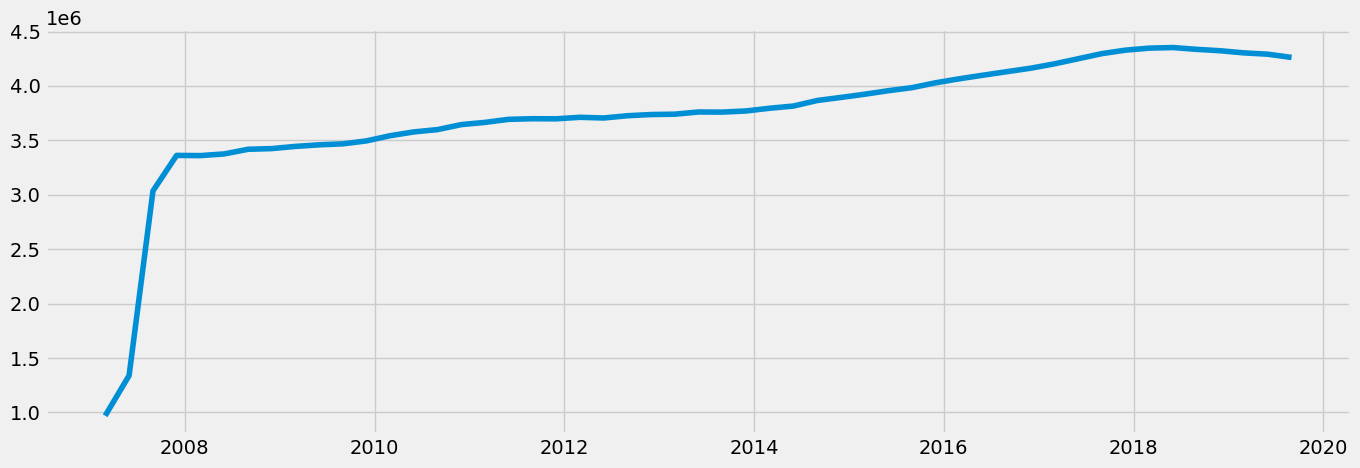

In [340]:
# Plotting the initial plot

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df['MA'])
plt.show()

# 04. Decomposition

In [349]:
# Check for missing values

df.isnull().sum() 

MA    0
dtype: int64

In [351]:
# Check for duplicates

dups = df.duplicated()
dups.sum()

0

In [353]:
# Decomposing the data set

decomposition = sm.tsa.seasonal_decompose(df, model='additive')

In [355]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

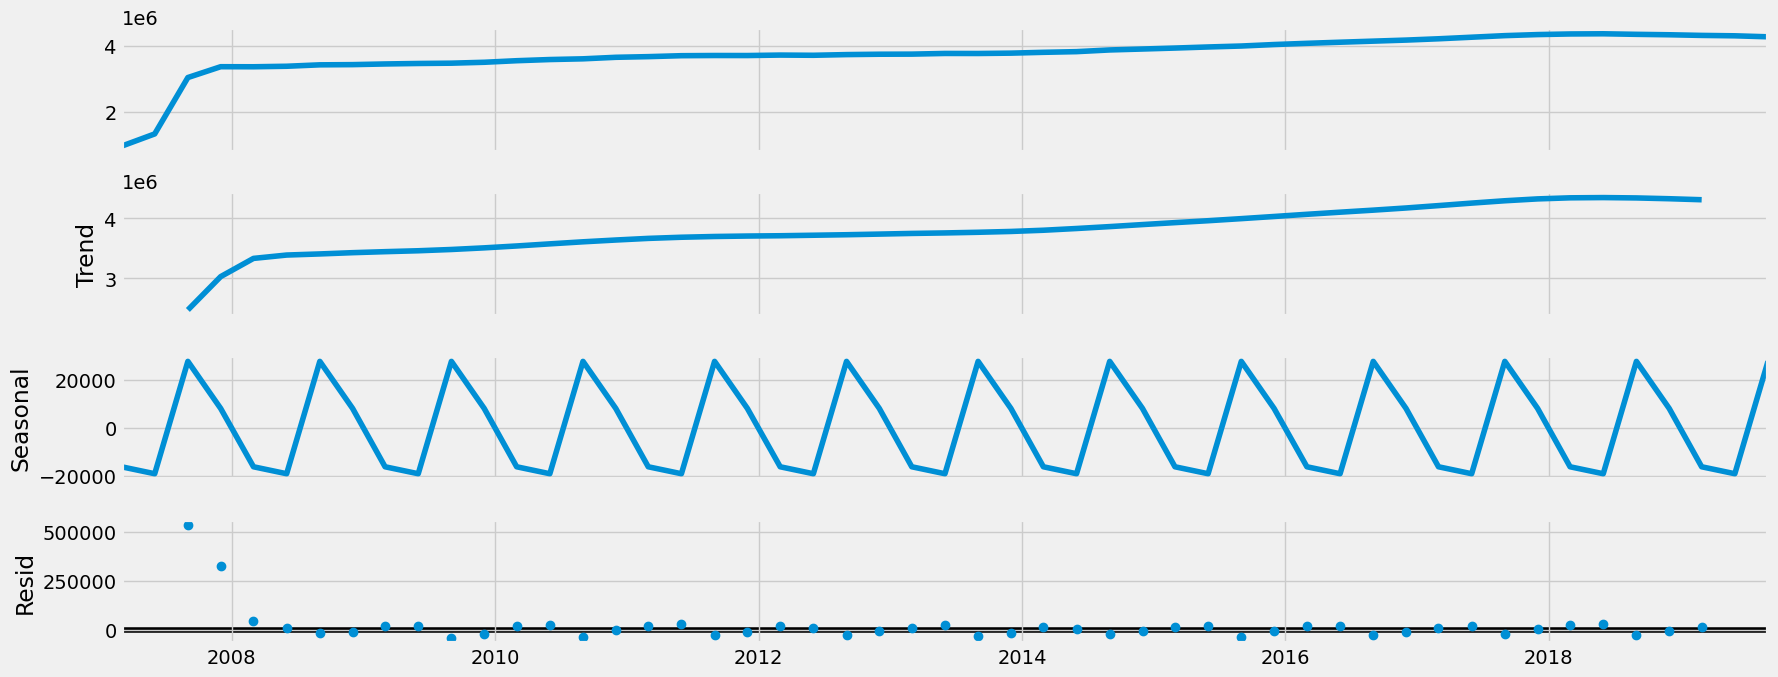

In [357]:
# Plot the separate components

decomposition.plot()
plt.show()

The overall trend is that the prices of housing units are gradually increasing. The big increase happened in 2008 due to the financial crisis. From then on there were no major fluctuations.

# 05. Stationarity

In [362]:
# Import the adfuller() function

from statsmodels.tsa.stattools import adfuller

In [366]:
# Finding out the stationarity

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['MA'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.430989
p-value                         0.567333
Number of Lags Used             9.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


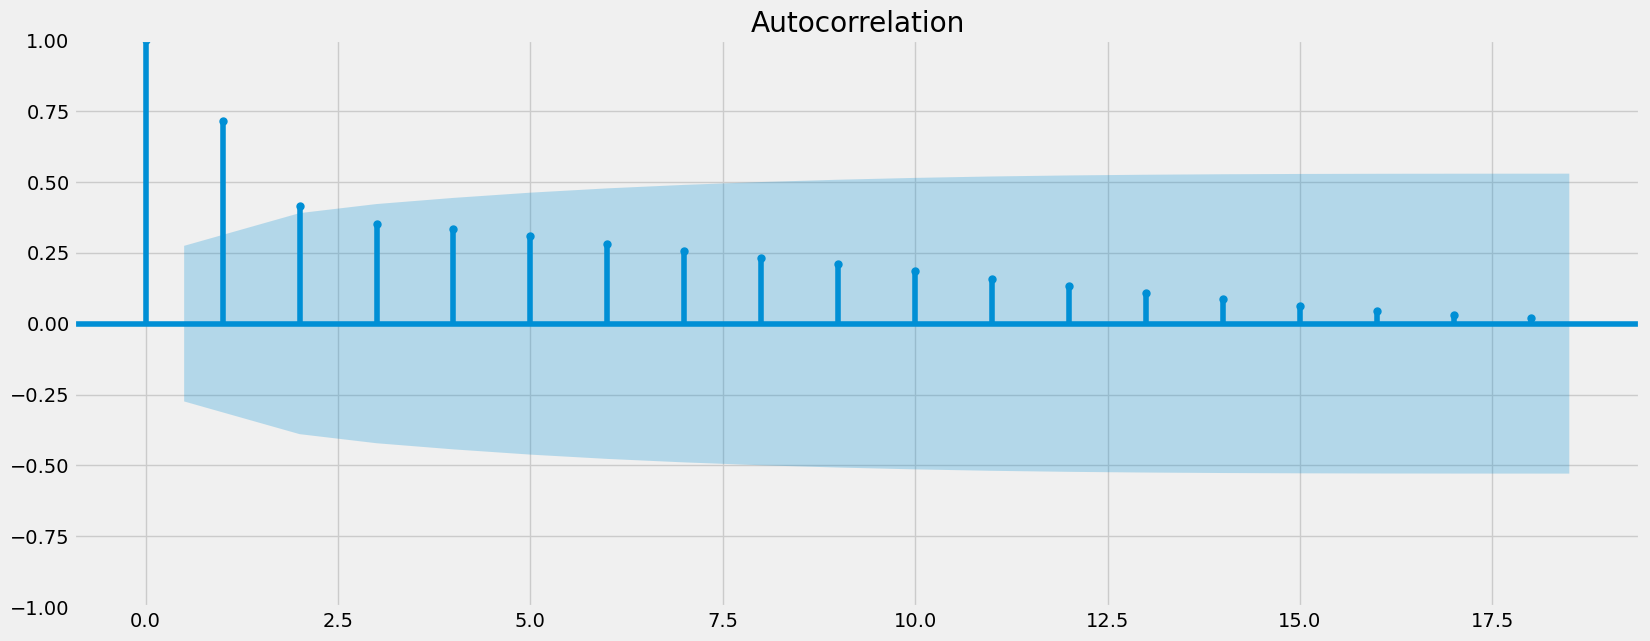

In [370]:
# Checking for autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df)
plt.show()

The data is non-stationary.

In [375]:
# Calculating the difference

df_diff = df - df.shift(1)

In [381]:
# Checking the results 
df_diff.head(10)

,MA
month_year,
2007-03-01,NaN
2007-06-01,368817.0
2007-09-01,1696669.0
2007-12-01,326076.0
2008-03-01,-1745.0
2008-06-01,15358.0
2008-09-01,42619.0
2008-12-01,6424.0
2009-03-01,19973.0


In [379]:
df_diff.columns

Index(['MA'], dtype='object')

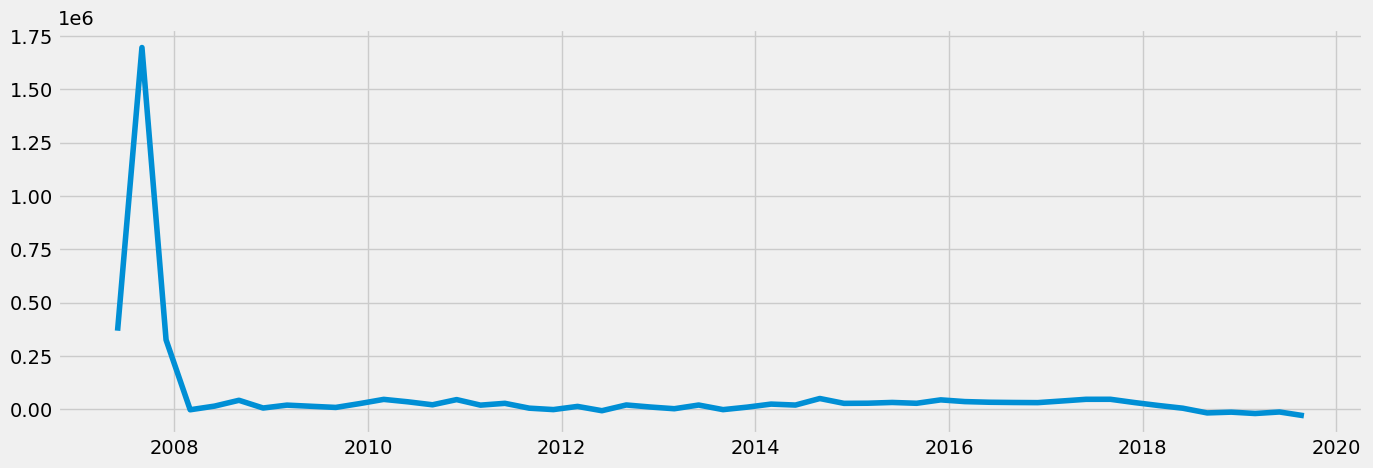

In [383]:
# Seeing what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [403]:
# remove the NaNs from the data set

df_dropna = df_diff.dropna()

In [405]:
# Checking the results 

df_dropna.head(10)

,MA
month_year,
2007-06-01,368817.0
2007-09-01,1696669.0
2007-12-01,326076.0
2008-03-01,-1745.0
2008-06-01,15358.0
2008-09-01,42619.0
2008-12-01,6424.0
2009-03-01,19973.0
2009-06-01,14506.0


In [407]:
# Doing the Dickey- Fuller test again

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_dropna['MA'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.941058
p-value                         0.312999
Number of Lags Used             5.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [409]:
# Calculating the difference again

df_diff = df_dropna - df_dropna.shift(1)

In [411]:
# Checking the results once more

df_diff.head(10)

,MA
month_year,
2007-06-01,NaN
2007-09-01,1327852.0
2007-12-01,-1370593.0
2008-03-01,-327821.0
2008-06-01,17103.0
2008-09-01,27261.0
2008-12-01,-36195.0
2009-03-01,13549.0
2009-06-01,-5467.0


In [413]:
# remove the NaNs from the data set

df_dropna = df_diff.dropna()

In [415]:
# Checking the results 

df_dropna.head(10)

,MA
month_year,
2007-09-01,1327852.0
2007-12-01,-1370593.0
2008-03-01,-327821.0
2008-06-01,17103.0
2008-09-01,27261.0
2008-12-01,-36195.0
2009-03-01,13549.0
2009-06-01,-5467.0
2009-09-01,-5346.0


In [417]:
# Doing the Dickey- Fuller test again

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_dropna['MA'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.114696
p-value                         0.025485
Number of Lags Used             4.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


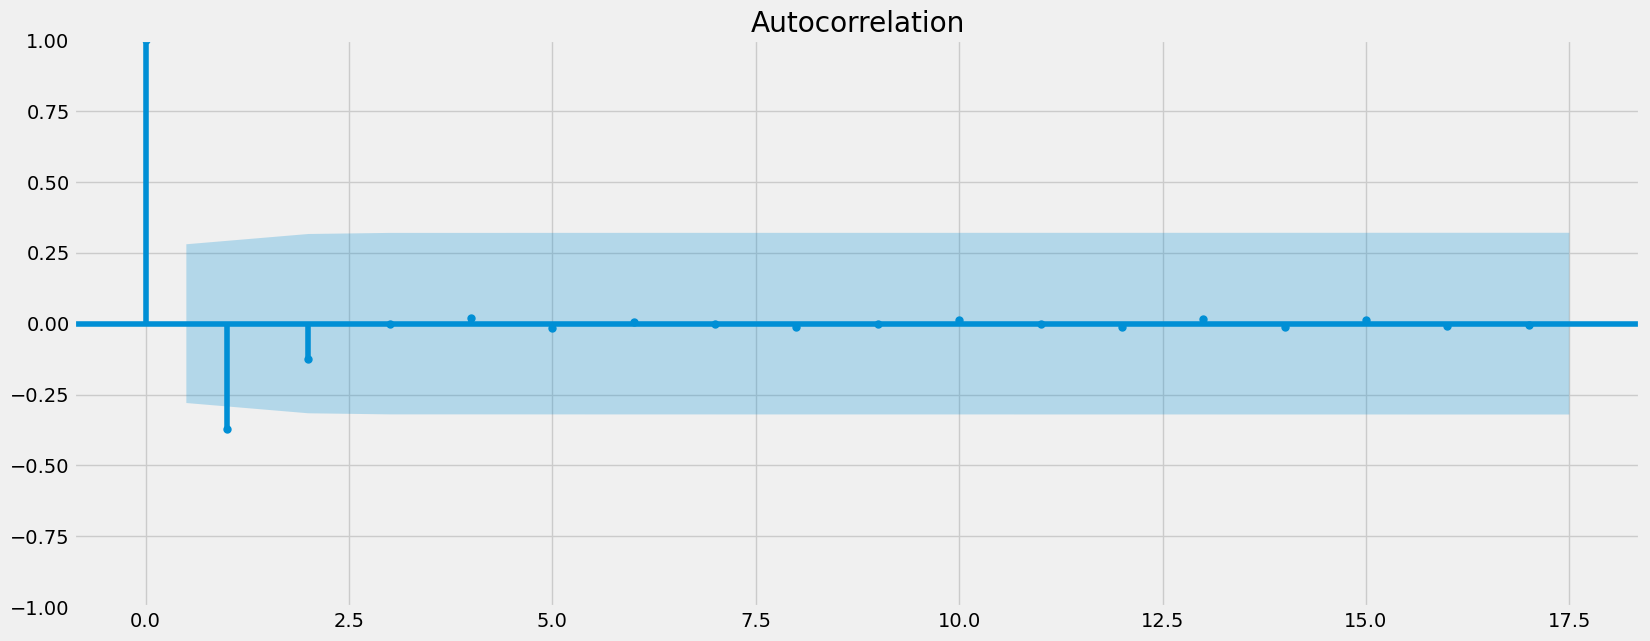

In [419]:
# Checking for autocorrelations

plot_acf(df_dropna)
plt.show()

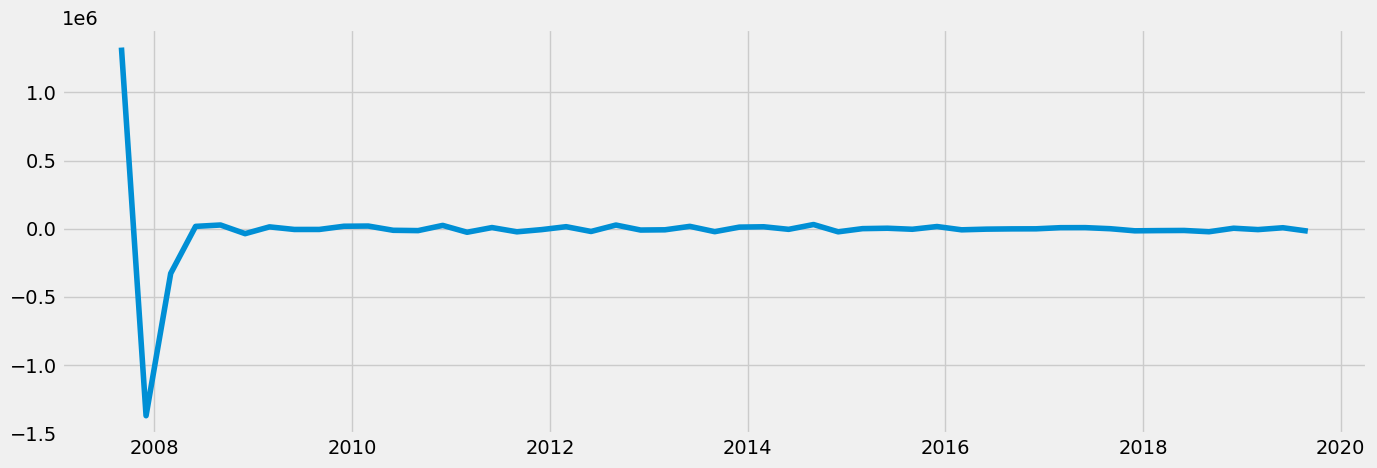

In [421]:
# Seeing what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_dropna)

The now the test statistic is lower than critical value. The p-value is also under 0.05. The autocorrelation visualization only shows two lines above the confidence interval. So, now the data can be considered stationary. 